# Project 2

Due date: July 27, 2021, 11:59 pm

- The result will be evaluated from a report in Jupyter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: July 27, 2021, 11:59 pm, through Bloque Neón + (Upload repository link)
- Projects will not be received after the delivery time or by any other means than the one established.

# Used Vehicle Price Prediction

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [1]:
%matplotlib inline
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
url="https://raw.githubusercontent.com/dljaimes/Advanced-Methods-in-Data-Analysis_1_Grupo_5/main/dataTrain_carListings.csv"
data = pd.read_csv(url)
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [3]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [4]:
data.shape

(500000, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    500000 non-null  int64 
 1   Year     500000 non-null  int64 
 2   Mileage  500000 non-null  int64 
 3   State    500000 non-null  object
 4   Make     500000 non-null  object
 5   Model    500000 non-null  object
dtypes: int64(3), object(3)
memory usage: 22.9+ MB


In [6]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='Price'>

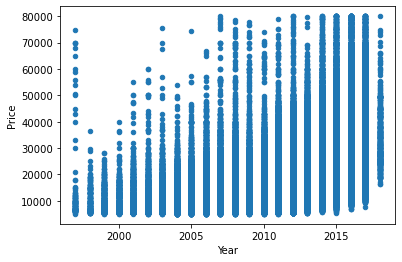

In [7]:
data.plot(kind='scatter', y='Price', x='Year')

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

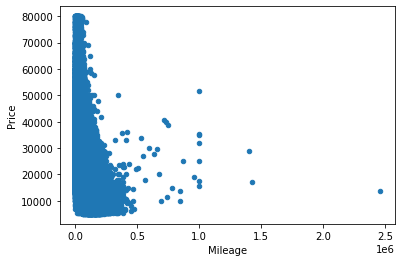

In [8]:
data.plot(kind='scatter', y='Price', x='Mileage')

In [9]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

# Exercise P2.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the models using a manually implemented K-Fold (K=10) cross-validation
- 25% - Notebook explaining the process for selecting the best model. You must specify how the calibration of each of the parameters is done and how these change the performance of the model. It is expected that a clear comparison will be made of all implemented models.. Present the most relevant conslusions about the whole process. 


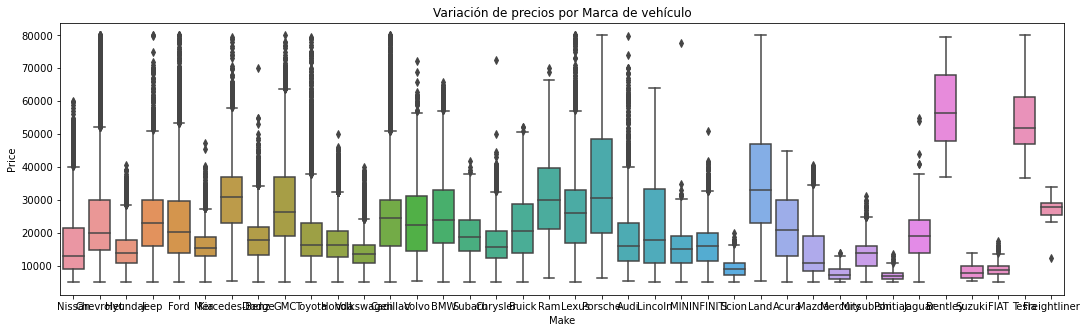

In [21]:
plt.figure(figsize=(18,5))
sn.boxplot(data=data[['Price', 'Make']],  x='Make', y='Price')
plt.title('Variación de precios por Marca de vehículo');

In [10]:
# Para la variable make:

make = data.Make.value_counts().to_frame()
make['cumsum'] = make.Make.cumsum()
make['pct_acum']= make['cumsum'] / 500000
make['pct_ind'] = make['Make'] / 500000

# Para la variable modelo:

modelos = data.Model.value_counts().to_frame()
modelos['cumsum'] = modelos.Model.cumsum()
modelos['pct_acum']= modelos['cumsum'] / 500000
modelos['pct_ind'] = modelos['Model'] / 500000

# Para la variable estado:

estados = data.State.value_counts().to_frame()
estados['cumsum'] = estados.State.cumsum()
estados['pct_acum']= estados['cumsum'] / 500000
estados['pct_ind']= estados['State'] / 500000
estados.reset_index(inplace=True)

In [11]:
data.shape

(500000, 6)

### AJUSTE EN LAS VARIABLES make y State

In [12]:
# Binning Make:

marcas = data.groupby(by='Make')['Price'].describe().sort_values(by='mean', ascending=False)#.reset_index(inplace=True)
marcas.reset_index(inplace=True)
marcas['quartil_make'] = pd.cut(marcas['mean'], bins=[0,marcas['mean'].quantile(0.15),marcas['mean'].quantile(0.3),
                                                     marcas['mean'].quantile(0.5), marcas['mean'].quantile(0.65),
                                                      marcas['mean'].quantile(0.80),marcas['mean'].quantile(0.90),                                                      
                                                      marcas['mean'].max()],
                               labels=[1,2,3,4,5,6,7])
data = data.merge(marcas[['Make', 'quartil_make']], on='Make', how='left')

In [13]:
# Binning Estado:

estados_ = data.groupby(by='State').Price.describe().sort_values(by='mean')
estados_.reset_index(inplace=True)
estados_['quartil_state'] = pd.cut(estados_['mean'], bins=[0,estados_['mean'].quantile(0.25),
                                                     estados_['mean'].quantile(0.5), estados_['mean'].quantile(0.75),                                                    
                                                      estados_['mean'].max()],
                               labels=[1,2,3,4])
data = data.merge(estados_[['State', 'quartil_state']], on='State', how='left')

In [15]:
data.groupby(by='State').Price.describe().sort_values(by='mean').head()#['mean'].describe()

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
DC,10.0,12216.700000,5143.545730,6500.0,7995.00,9997.0,16748.0,20945.0
HI,1486.0,17558.610363,9760.476671,5200.0,10146.25,14995.0,22995.0,79995.0
VA,19851.0,18743.160899,10223.211944,5010.0,11477.00,16199.0,23857.5,79995.0
CT,6178.0,18757.044837,9552.529537,5241.0,11995.00,16555.0,23574.5,78618.0
OH,14171.0,19112.618376,9814.434967,5024.0,12203.50,16783.0,24000.0,76500.0


In [16]:
data.groupby(by='Model')['Price'].describe().sort_values(by='mean', ascending=False)['mean'].describe()

count      525.000000
mean     19552.526359
std       9425.334884
min       6248.298851
25%      12108.394958
50%      17364.185950
75%      25028.864286
max      57455.095890
Name: mean, dtype: float64

C:\Users\Leonardo\anaconda3\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

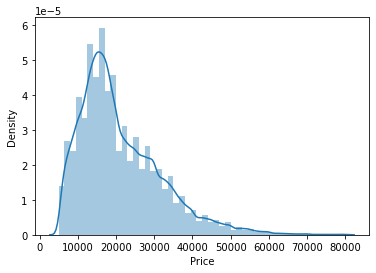

In [66]:
sn.distplot(data.Price)

<AxesSubplot:xlabel='Model', ylabel='Price'>

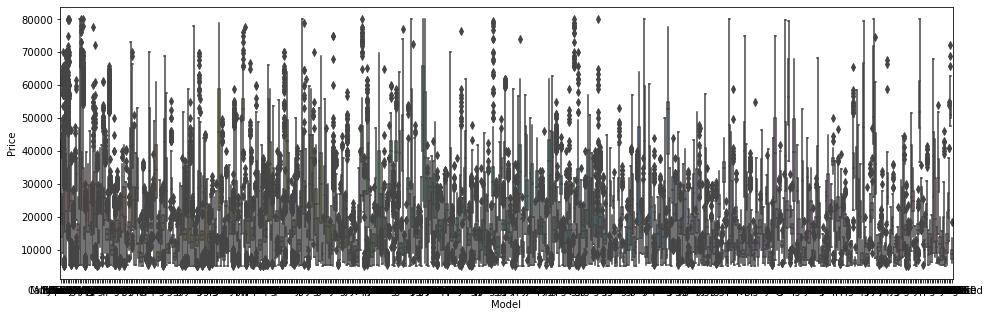

In [59]:
plt.figure(figsize=(16,5))
sn.boxplot(data=data[['Price', 'Model']],  x='Model', y='Price')

<AxesSubplot:xlabel='Make', ylabel='Price'>

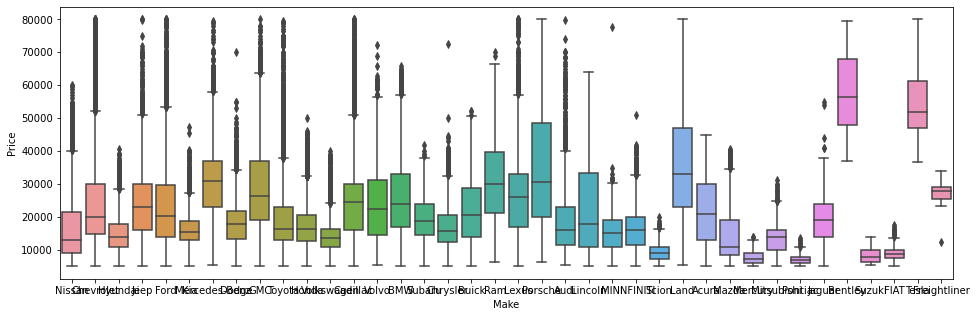

In [29]:
plt.figure(figsize=(16,5))
sn.boxplot(data=data[['Price', 'Make']],  x='Make', y='Price')

<AxesSubplot:xlabel='State', ylabel='Price'>

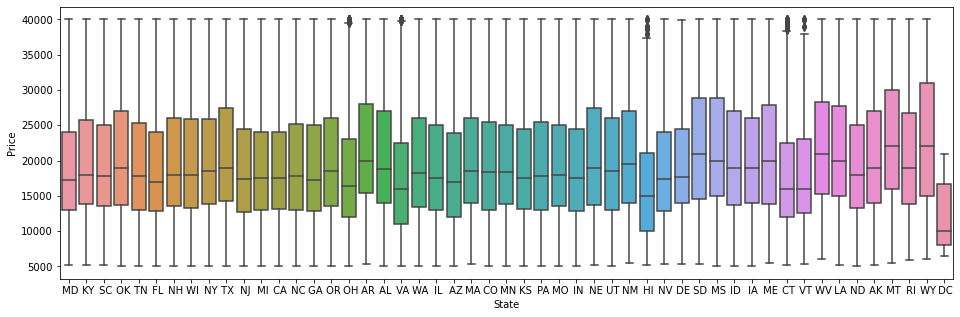

In [213]:
plt.figure(figsize=(16,5))
sn.boxplot(data=data[['Price', 'State']][data['Price']<40000],  x='State', y='Price')

<AxesSubplot:xlabel='Price', ylabel='Mileage'>

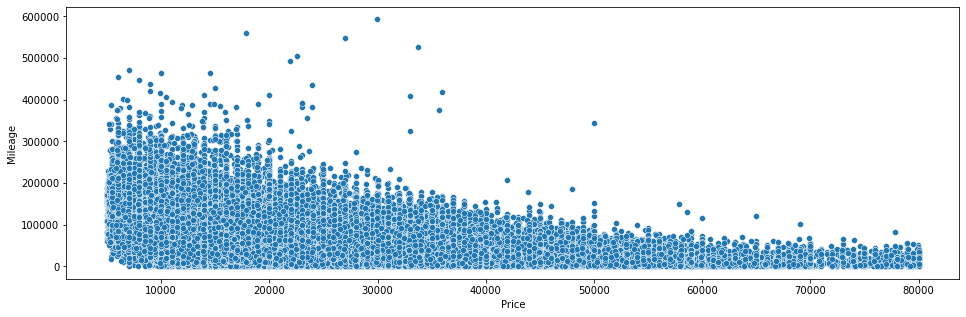

In [142]:
plt.figure(figsize=(16,5))
sn.scatterplot(data=data[data['Mileage']<600000][['Mileage', 'Price']], y='Mileage', x='Price')

In [140]:
data['Mileage'].describe()

count    5.000000e+05
mean     5.507643e+04
std      4.089704e+04
min      5.000000e+00
25%      2.585500e+04
50%      4.299000e+04
75%      7.740600e+04
max      2.457832e+06
Name: Mileage, dtype: float64

In [143]:
data[data['Mileage']<600000][['Price', 'Year', 'Mileage']].corr()

,Price,Year,Mileage
Price,1.000000,0.479853,-0.476942
Year,0.479853,1.000000,-0.760352
Mileage,-0.476942,-0.760352,1.000000


In [111]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

<AxesSubplot:xlabel='State', ylabel='Price'>

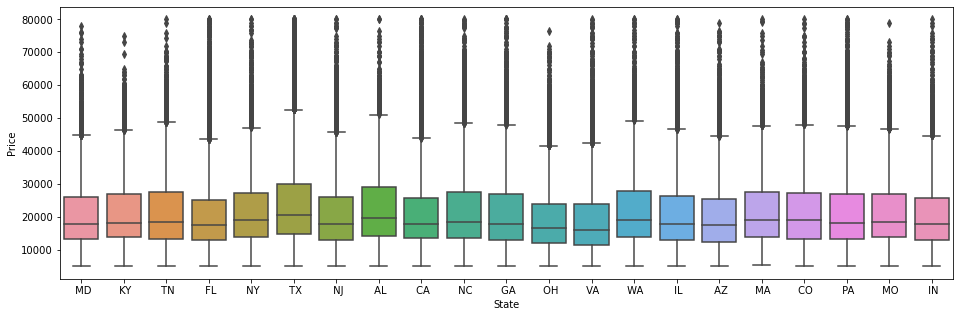

In [110]:
plt.figure(figsize=(16,5))
sn.boxplot(data=data[data['State'].isin(estados.iloc[:21,0])][['Price', 'State']],  x='State', y='Price')

In [118]:
make['Make'].head()

Ford         78627
Chevrolet    72900
Toyota       57485
Honda        41490
Jeep         30413
Name: Make, dtype: int64

In [53]:
modelos['cont_pct'] = modelos['Model'] / 500000

In [57]:
modelos

,Model,cumsum,pct,cont_pct
Silverado,22562,22562,0.045124,0.045124
Grand,15382,37944,0.075888,0.030764
Sierra,10423,48367,0.096734,0.020846
Accord,9145,57512,0.115024,0.018290
F-1504WD,8379,65891,0.131782,0.016758
...,...,...,...,...
Element2WD,69,499735,0.999470,0.000138
MuranoS,68,499803,0.999606,0.000136
PathfinderSE,66,499869,0.999738,0.000132
RX-84dr,66,499935,0.999870,0.000132


In [146]:
data.Mileage.describe()

count    5.000000e+05
mean     5.507643e+04
std      4.089704e+04
min      5.000000e+00
25%      2.585500e+04
50%      4.299000e+04
75%      7.740600e+04
max      2.457832e+06
Name: Mileage, dtype: float64

In [149]:
# Agrupación variable marcas (otro): se reducen las marcas teniendo en cuenta el % de participación de cada una (max 4%)

top_marcas = data.Make.value_counts().to_frame()
top_marcas['pctn'] = top_marcas['Make']/500000
top_marcas = top_marcas[top_marcas.pctn >= 0.04]
top_marcas=top_marcas.reset_index().drop(columns=['pctn','Make'])
top_marcas = top_marcas['index'].tolist()

data['marca_ct']=np.where(data['Make'].isin(top_marcas),data['Make'],'Otro')

Categorización de las variables numéricas

In [75]:
# Categoprizacion de variables numéricas:

# Mileage
data['mileage_cut'] = pd.cut(data.Mileage, bins=[4 , data.Mileage.quantile(0.25) , data.Mileage.quantile(0.50), 
                                                 data.Mileage.quantile(0.75), data.Mileage.max() ], 
                             labels=[1,2,3,4]  )

# Año
data['yaer_cut'] = pd.cut(data.Year, bins=[1996, 2000, 2010, 2018], labels=[1,2,3])


In [76]:
# Ze pasan a valores enteros:

data['mileage_cut']=data['mileage_cut'].astype('int') 
data['yaer_cut'] = data['yaer_cut'].astype('int')


Particion de los datos

In [152]:
# Train

x = data[['Year', 'Mileage', 'quartil_make','quartil_state']].iloc[:400000]
y = data['Price'].iloc[:400000]


# Test:

x_test = data[['Year', 'Mileage','quartil_make','quartil_state']].iloc[400000:]
y_test = data['Price'].iloc[400000:]

Se opta por usar las variables de año, Mileage y cuartiels de make y State como variables regresoras (presentan un mejor desempeño).

# 2. MODELAMIENTO 

In [48]:
import seaborn as sn
import numpy as np
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import cross_val_score as cvs
import sklearn


###### Prueba inicial con Random Forest sin calibrar

In [202]:
%%time

# Modelo usando únicamente ['Year', 'mileage_cut'] como variables regresoras

modelo_rfr = rfr()

res_2  = np.sqrt(abs(cvs(modelo_rfr, x,y, cv=4, scoring='neg_mean_squared_error')))


# [10879.77414699, 10702.09670534, 10763.2634908 , 10602.23985206]

Wall time: 41.3 s


In [203]:
np.mean(res_2)

9301.133389188466

Se observa que al usar la variable de mileage categorizada, los resultados del rmse pasan de 10 mil a 9 mil.

### 2.1. CALIBRACIÓN ADABOOST

In [53]:
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error

 Calibración:

In [ ]:
%%time

param_grid_ad = {'learning_rate': [0.001, 1.0], 'n_estimators':[100,200]}

cv=4

model_ad = AdaBoostRegressor()

grid_search = GridSearchCV(estimator = model_ad, param_grid = param_grid_ad,cv = cv)

grid_search.fit(x, y)

In [217]:
learning_rate=grid_search.best_params_['learning_rate']

n_estimators=grid_search.best_params_['n_estimators']

# Mejor calibracion : {'learning_rate': 0.001, 'n_estimators': 100}

In [218]:
grid_search.best_params_

{'learning_rate': 0.001, 'n_estimators': 100}

 Implementación del modelo y desempeño:

In [222]:
# DEBE SER CON VALIDACIÓN CRUZADA MANUAL:

modelo_ad =AdaBoostRegressor(n_estimators =n_estimators,learning_rate=learning_rate)

scores_ad = cross_val_score(
                    estimator = modelo_ad,
                    X         = x,
                    y         = y,
                    scoring   = 'neg_root_mean_squared_error',
                    cv        = 10)

In [223]:
print(f"RMSE de modelo Adaboost calibrado: {-np.mean(scores_ad)}")

RMSE de modelo Adaboost calibrado: 9156.674403617513


EN TEST:

In [227]:
# Se calibra el modelo con los mejores hiperparámetros con los datos de entrenamiento

modelo_final_add_boost = modelo_ad.fit(x,y)

In [228]:
# se predice sobre los datos de test:

np.sqrt(mean_squared_error(modelo_final_add_boost.predict(x_test), y_test))

9147.53237376106

El modelo de Adaboost tiene un desempeño de 9147 para los datos de test (últimos 100 mil datos)

## 2.2 RANDOM FOREST

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [154]:
%%time

param_grid_rf = {'max_depth': [2,4],'max_features': [2,3],'n_estimators':[50,100]}

rf = RandomForestRegressor()

grid_search_rf = GridSearchCV(estimator=rf, param_grid = param_grid_rf,cv = 4, n_jobs = -1, verbose = 2, 
                             scoring='neg_mean_squared_error')

grid_search_rf.fit(x, y) 

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Wall time: 3min 3s


GridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4], 'max_features': [2, 3],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [155]:
max_depth=grid_search_rf.best_params_['max_depth']

max_features=grid_search_rf.best_params_['max_features']

n_estimators=grid_search_rf.best_params_['n_estimators']

print((grid_search_rf.best_params_)) 

{'max_depth': 4, 'max_features': 3, 'n_estimators': 100}


 Implementación y desempeño

In [156]:
%%time

# Validación cruzada para el modelo con los mejores parámetros:

modelo_rf = RandomForestRegressor(bootstrap= True,n_estimators =n_estimators,criterion='mse',max_depth=max_depth,
                                   max_features =max_features,random_state = 123)

scores_rf = cross_val_score(estimator = modelo_rf,X=x,y=y.values.ravel(),
                            scoring='neg_root_mean_squared_error',cv=10)

print(f"RMSE de modelo random forest calibrado: {-np.mean(scores_rf)}")

RMSE de modelo random forest calibrado: 7998.31583329274
Wall time: 6min 1s


EN TEST

In [157]:
# Se calibra el modelo con los mejores hiperparámetros con los datos de entrenamiento

modelo_final_rf = modelo_rf.fit(x,y)

In [112]:
# se predice sobre los datos de test:

np.sqrt(mean_squared_error(modelo_final_rf.predict(x_test), y_test))

7998.202496531476

Random forest mejor que que Adaboost

## 2.3 XGBOOST

In [113]:
from sklearn.ensemble import GradientBoostingRegressor

Calibración MAX_FEATURES:

In [158]:
%%time

# CALIBRACIÓN MAX_FEATURES:

max_features_range=range(1, x.shape[1], 1)

cv_scores  = []

for max_features in max_features_range:
        modelo = GradientBoostingRegressor(
                    max_features = max_features,
                    random_state = 123)

        scores = cross_val_score(
            estimator = modelo,
            X= x, y= y,scoring='neg_root_mean_squared_error',
                    cv= 4)

        # Se agregan los scores de cross_val_score() y se pasa a positivo
        cv_scores.append(-1*scores.mean())

Wall time: 5min 14s


In [159]:
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

Valor óptimo de max_features: 3


In [160]:
max_features_final = 3

Calibración LEARNING RATE

In [161]:
import warnings
warnings.filterwarnings("ignore")

In [162]:
# CALIBRACIÓN LEARNING RATE:


learning_rate_range=np.linspace(0.01, 1, 5 )
cv_scores  = []

for lr in learning_rate_range:
        modelo = GradientBoostingRegressor(
                    learning_rate = lr,
                    random_state = 123)

        scores = cross_val_score(
            estimator = modelo,
            X= x, y= y,scoring='neg_root_mean_squared_error',
                    cv= 4)

        # Se agregan los scores de cross_val_score() y se pasa a positivo
        cv_scores.append(-1*scores.mean())

In [163]:
print(f"Valor óptimo de learning_rate: {learning_rate_range[np.argmin(cv_scores)]}")

Valor óptimo de learning_rate: 0.505


In [164]:
learning_rate_final = 0.505

Calibración N_ESTIMATORS

In [165]:
%%time

# CALIBRACIÓN NÚMERO DE ESTIMADORES:

n_estimadores_range=range(50, 150, 50)
cv_scores  = []
for n_est in n_estimadores_range:
        modelo = GradientBoostingRegressor(
                    n_estimators = n_est,
                    random_state = 123)

        scores = cross_val_score(
            estimator = modelo,
            X= x, y= y,scoring='neg_root_mean_squared_error',
                    cv= 4)

        # Se agregan los scores de cross_val_score() y se pasa a positivo
        cv_scores.append(-1*scores.mean())

Wall time: 3min 24s


In [166]:
print(f"Valor óptimo de max_features: {n_estimadores_range[np.argmin(cv_scores)]}")

Valor óptimo de max_features: 100


In [167]:
n_estimators_final = 100

 Implementación y desempeño

In [168]:
# Modelo gboost con los mejores parámetros:

modelo_gb =  GradientBoostingRegressor(learning_rate= learning_rate_final,n_estimators =n_estimators_final,
                                       criterion='mse',max_features =max_features_final,random_state = 123)

scores_gb = cross_val_score(estimator = modelo_gb,X=x,y=y,scoring='neg_root_mean_squared_error',
                                               cv=10)

In [169]:
print(f"RMSE de modelo XGBoost calibrado: {-np.mean(scores_gb)}")

RMSE de modelo XGBoost calibrado: 7649.171808467273


In [170]:
# Se calibra el modelo con los mejores hiperparámetros con los datos de entrenamiento

modelo_final_GB = modelo_gb.fit(x,y)

In [171]:
# se predice sobre los datos de test:

np.sqrt(mean_squared_error(modelo_final_GB.predict(x_test), y_test))

7653.942261938101

In [172]:
x

,Year,Mileage,quartil_make,quartil_state
0,2014,31909,2,1
1,2016,25741,4,2
2,2016,24633,2,2
3,2012,84026,5,3
4,2013,22816,5,3
...,...,...,...,...
399995,2015,40528,4,1
399996,2006,96321,7,2
399997,2008,52415,4,3
399998,2014,43185,2,4


El Gradient Boosting predice un poco mejor que Random Forest

In [85]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Model', ylabel='Price'>

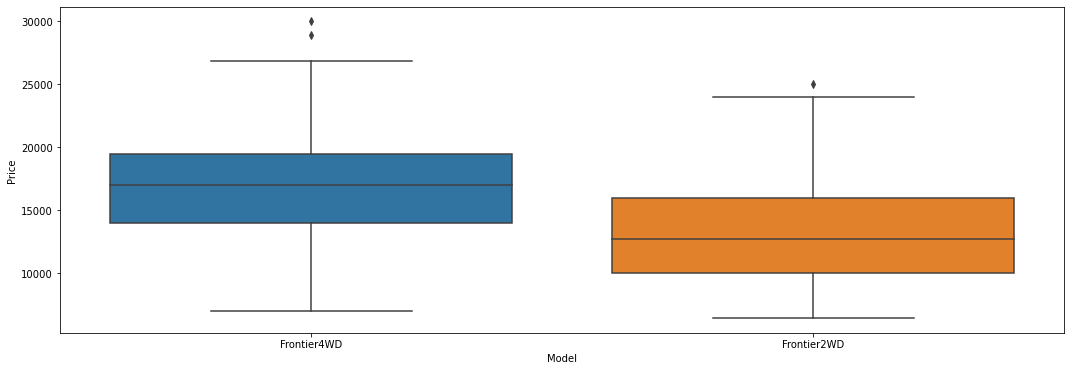

In [89]:
plt.figure(figsize=(18,6))
sn.boxplot(data = data[(data['Make']=='Nissan')&(data['Model'].isin(['Frontier2WD','Frontier4WD']))] , x= 'Model', y='Price')

In [79]:
data[data['Make']=='Nissan']['Model'].value_counts()

MuranoAWD        2088
Altima4dr        1804
Murano2WD         936
Maxima4dr         840
Pathfinder4WD     768
Sentra4dr         694
PathfinderS       587
Armada4WD         540
Titan4WD          451
RogueFWD          429
Armada2WD         419
Pathfinder2WD     408
Versa5dr          369
Frontier2WD       343
Frontier4WD       341
350Z2dr           309
Titan             294
Titan2WD          283
Xterra4WD         243
Versa4dr          240
Quest4dr          216
Frontier          170
Xterra4dr         140
Xterra2WD         122
MuranoS            68
PathfinderSE       66
Name: Model, dtype: int64

In [75]:
tabla_modelos = pd.crosstab(data.Make, data.Model)

tabla_modelos.reset_index(inplace=True)
tabla_modelos.iloc[27].to_frame().reset_index()

,Model,27
0,Make,Nissan
1,1,0
2,15002WD,0
3,15004WD,0
4,1500Laramie,0
...,...,...
521,Yukon4WD,0
522,Yukon4dr,0
523,tC2dr,0
524,xB5dr,0


In [69]:
np.where( pd.crosstab(data.Make, data.Model) > 0, 1,0)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<AxesSubplot:xlabel='Model', ylabel='Price'>

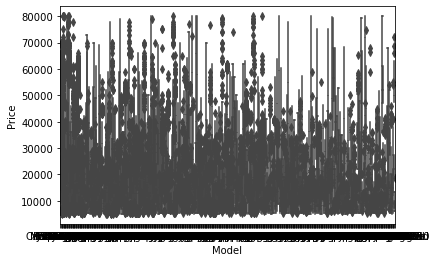

In [63]:
sn.boxplot(data = data[['Price', 'Model']] , x= 'Model', y='Price')

Se exporta el mejor modelo

In [173]:
import pickle

In [174]:
pickle.dump(modelo_final_GB, open('modelo_price_auto_gbV2.pkl', 'wb'))

In [177]:
data.State.unique()

array([' MD', ' KY', ' SC', ' OK', ' TN', ' FL', ' NH', ' WI', ' NY',
       ' TX', ' NJ', ' MI', ' AL', ' CA', ' NC', ' GA', ' OR', ' OH',
       ' AR', ' VA', ' WA', ' IL', ' AZ', ' MA', ' CO', ' MN', ' KS',
       ' PA', ' MO', ' SD', ' IN', ' NE', ' UT', ' NM', ' HI', ' NV',
       ' DE', ' MS', ' ID', ' IA', ' ME', ' CT', ' MT', ' VT', ' WV',
       ' LA', ' ND', ' AK', ' RI', ' WY', ' DC'], dtype=object)

In [180]:
modelo_final_GB.predict(np.array([[2014,50000,2,4]]))#.reshape(1, -1))

array([15907.12185596])

In [47]:
modelo_final_GB.predict(np.array([[2014,50000]]))[0]

19417.715494615455

In [54]:
os.chdir(r'C:\Users\Leonardo\Desktop')

In [60]:
os.listdir()


['.ipynb_checkpoints',
 'api.ipynb',
 'correo_ejemplo.msg',
 'desktop.ini',
 'Leo',
 'Microsoft Teams.lnk',
 'modelo_price_auto_gb.pkl',
 'model_deployment_p2_g5.py',
 'NLP.ipynb',
 'phishing_clf.pkl',
 'Proyecto_1_T1_v2.ipynb',
 'Proyecto_2.ipynb',
 'Zoom.lnk']

In [62]:
from model_deployment_p2_g5 import prec_precio

In [75]:
prec_precio()

TypeError: prec_precio() missing 2 required positional arguments: 'año' and 'km'

In [77]:
import flask

# Exercise P2.2 (50%)

Create an API of the model.

Example:
![](https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/img015.PNG)

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine
